# Titanic Classification

#### Make a system which tells whether the person will be save from sinking. What factors were most likely lead to success-socio-economic status, age, gender and more.

In [1]:
#import required libraries and modules
import pandas as pd 
import numpy as np      

import seaborn as sns                 
import matplotlib.pyplot as plt       
%matplotlib inline 

#pip install plotly
import plotly.express as px
import warnings  
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


D:\AI_ML\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Loading the Titanic dataset
df=pd.read_csv("titanic.csv")
df.head()

,passengerId,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Data Exploration

In [3]:
df.tail()

,passengerId,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [4]:
df.describe()

,passengerId,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 16)

In [6]:
df.columns

Index(['passengerId', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerId  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


In [8]:
# how many columns are of integer type
print('number of columns of integer type : ', df.select_dtypes(include='int64').shape[1])
# how many columns are of object type
print('number of columns of object type  : ', df.select_dtypes(include='object').shape[1])
# how many columns are of float type
print('number of columns of float type   : ', df.select_dtypes(include='float64').shape[1])
# how many columns are of boolean type
print('number of columns of boolean type : ', df.select_dtypes(include='bool').shape[1])

number of columns of integer type :  5
number of columns of object type  :  7
number of columns of float type   :  2
number of columns of boolean type :  2


In [9]:
df[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)
#We observe significant correlation (>0.5) among Pclass=1 and Survived. We decide to include this feature in our model.

,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
df[["sex", "survived"]].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)
#We confirm the observation during problem definition that Sex=female had very high survival rate at 74%

,sex,survived
0,female,0.742038
1,male,0.188908


In [11]:
df[["sibsp", "survived"]].groupby(['sibsp'], as_index=False).mean().sort_values(by='survived', ascending=False)
#These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features

,sibsp,survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


### Finding missing values

In [12]:
df.isnull().sum()

passengerId      0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
df['age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

In [14]:
df['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [15]:
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [16]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

### imputing the missing values

In [17]:
#imputing the obect type column i.e.., Deck, embarked , embark_town
df['deck'].fillna(df['deck'].mode()[0],inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)

In [18]:
#inputing the int type column i.e.., age
df['age'].fillna(df['age'].mean(),inplace=True)

In [19]:
df.isnull().sum().sum()


0

In [20]:
df

,passengerId,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Data Visualization

array([[<AxesSubplot:title={'center':'passengerId'}>,
        <AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'pclass'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sibsp'}>,
        <AxesSubplot:title={'center':'parch'}>],
       [<AxesSubplot:title={'center':'fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

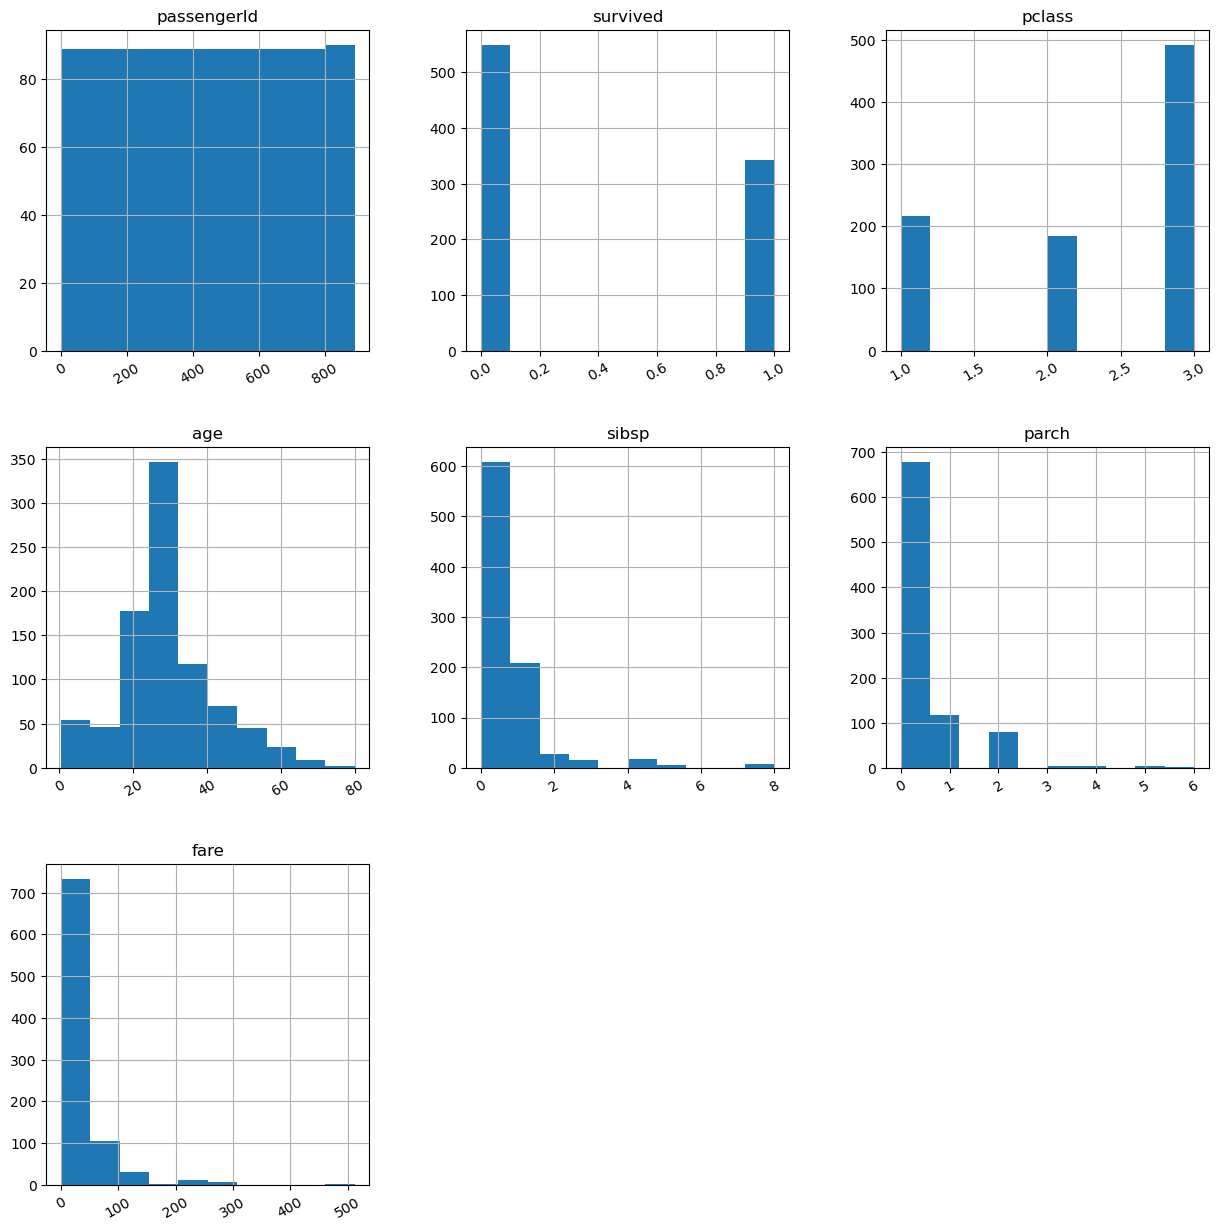

In [21]:
df.hist(figsize=(15,15), xrot=30)

### Frequency analysis

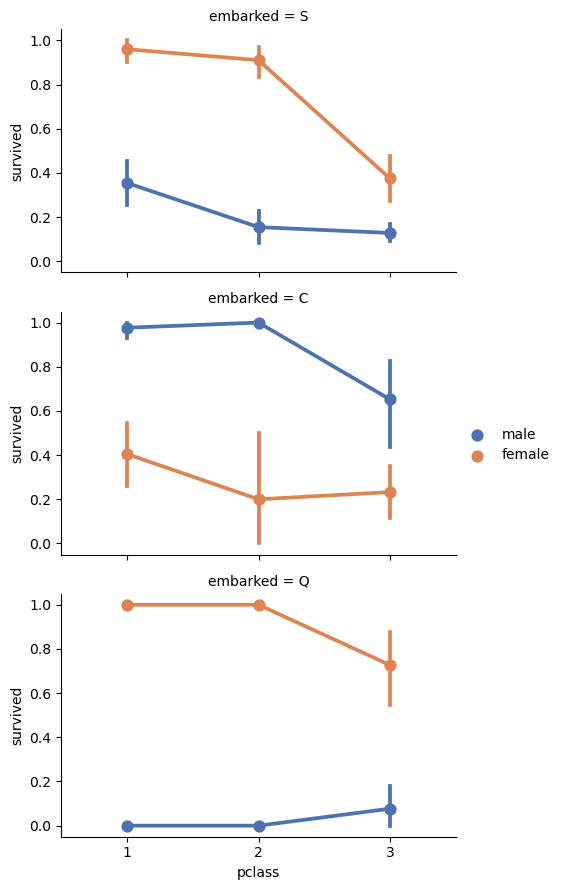

In [22]:
grid = sns.FacetGrid(df, row='embarked', aspect=1.6)
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette='deep')
grid.add_legend()

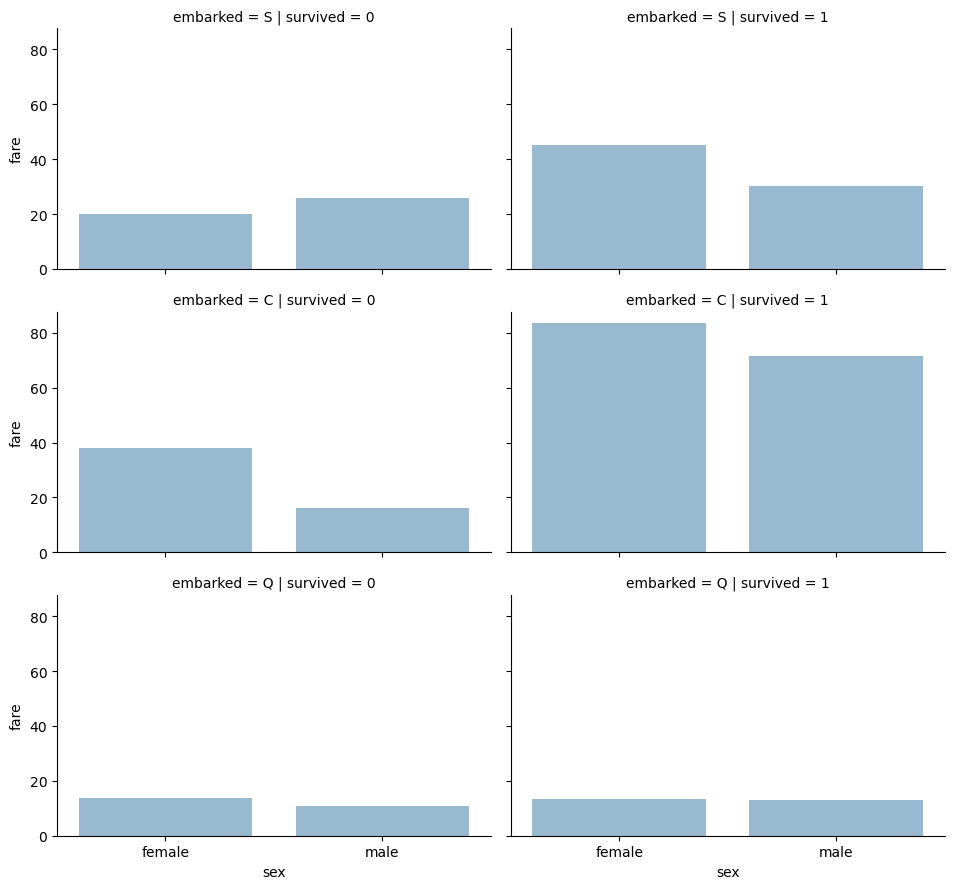

In [23]:
grid = sns.FacetGrid(df, row='embarked', col='survived', aspect=1.6)
grid.map(sns.barplot, 'sex', 'fare', alpha=.5, ci=None)
grid.add_legend()

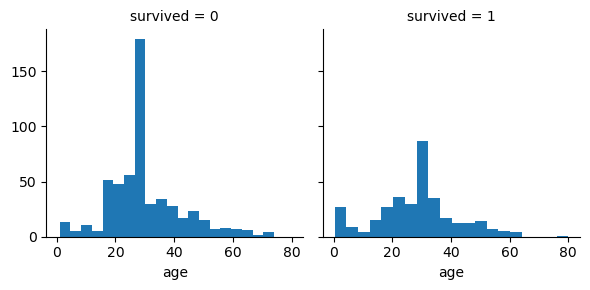

In [24]:
g = sns.FacetGrid(df, col='survived')
g.map(plt.hist, 'age', bins=20)

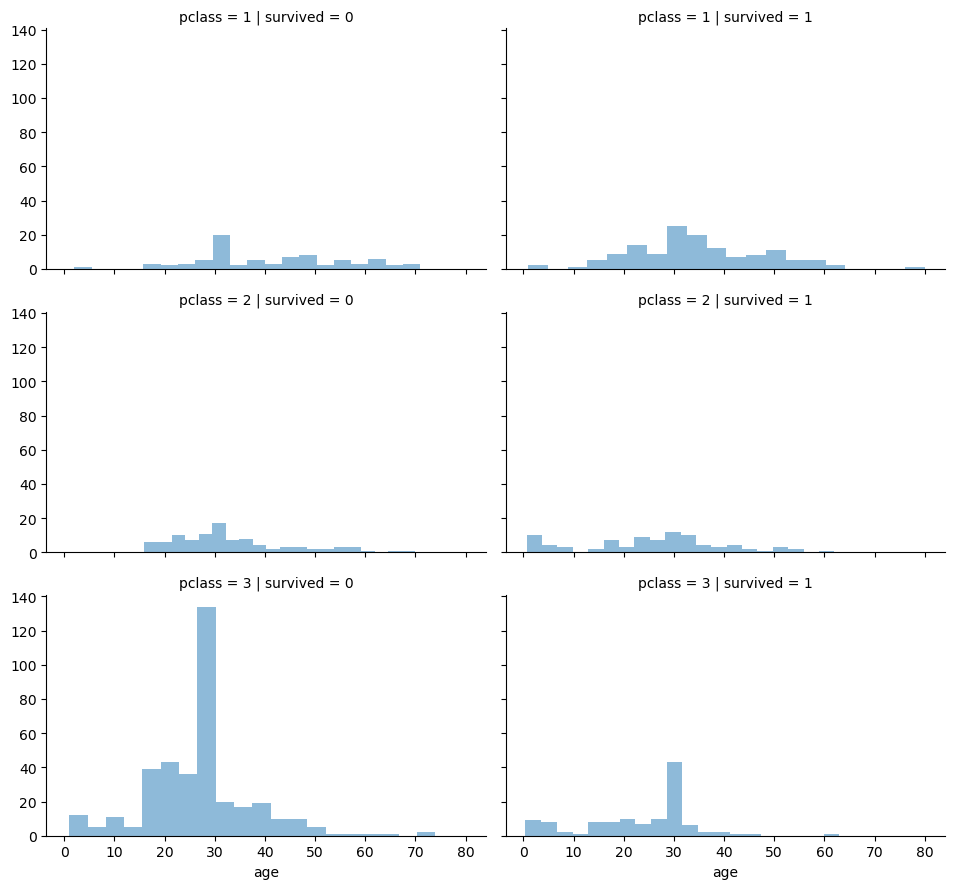

In [25]:
grid = sns.FacetGrid(df, col='survived', row='pclass', aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

In [26]:
'''Observations.

Pclass=3 had most passengers, however most did not survive.
Infant passengers in Pclass=2 and Pclass=3 mostly survived..
Most passengers in Pclass=1 survived.
Pclass varies in terms of Age distribution of passengers.'''

'Observations.\n\nPclass=3 had most passengers, however most did not survive.\nInfant passengers in Pclass=2 and Pclass=3 mostly survived..\nMost passengers in Pclass=1 survived.\nPclass varies in terms of Age distribution of passengers.'

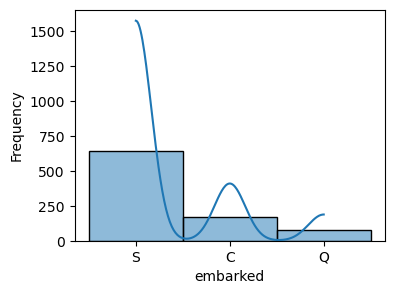

In [27]:
plt.figure(figsize=(4, 3))
sns.histplot(df['embarked'], bins=30, kde=True)
plt.xlabel('embarked')
plt.ylabel('Frequency')
plt.show()

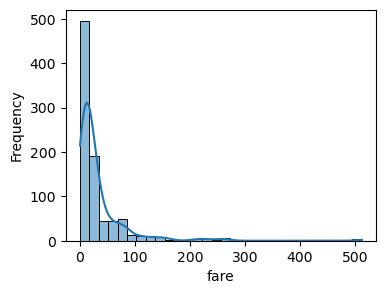

In [28]:
plt.figure(figsize=(4, 3))
sns.histplot(df['fare'], bins=30, kde=True)
plt.xlabel('fare')
plt.ylabel('Frequency')
plt.show()

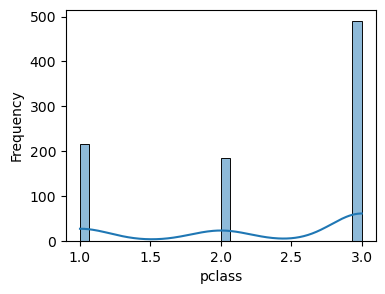

In [29]:
plt.figure(figsize=(4, 3))
sns.histplot(df['pclass'], bins=30, kde=True)
plt.xlabel('pclass')
plt.ylabel('Frequency')
plt.show()

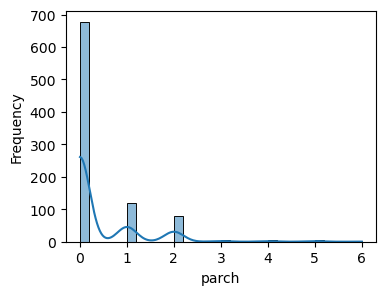

In [30]:
plt.figure(figsize=(4, 3))
sns.histplot(df['parch'], bins=30, kde=True)
plt.xlabel('parch')
plt.ylabel('Frequency')
plt.show()

### correlation analysis

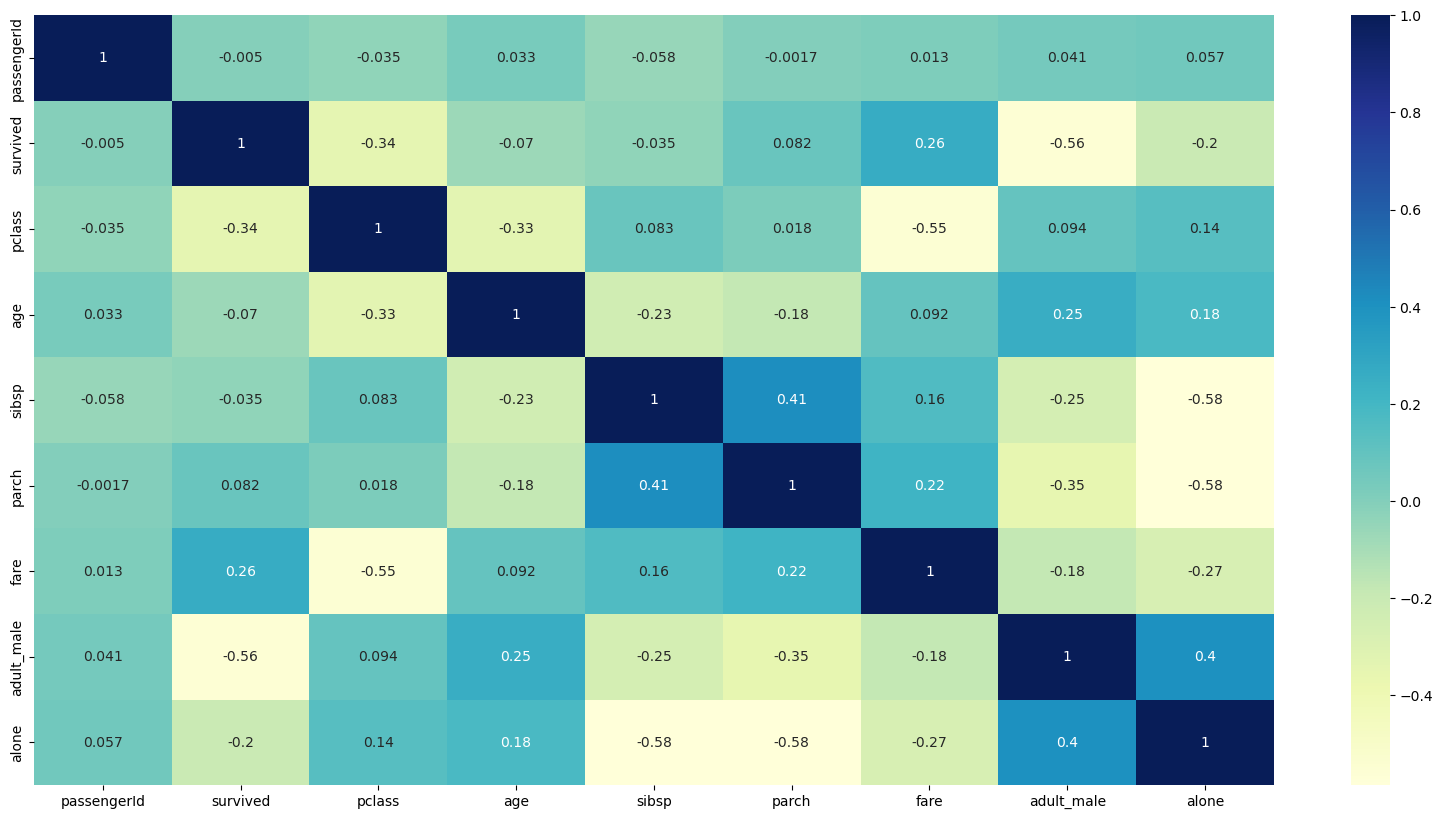

In [31]:
heat  = df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(heat, annot = True, cmap="YlGnBu")
plt.show()

In [32]:
df

,passengerId,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


 ### Multivariate Analysis

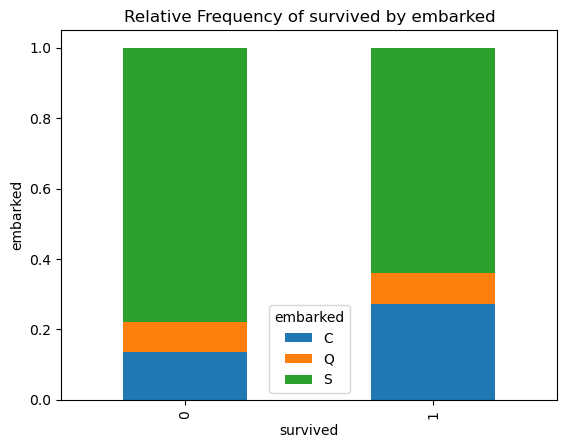

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a cross-tabulation for 'survived' and 'embarked'
Gdr = pd.crosstab(df['survived'], df['embarked'])

# Plot the stacked histogram for 'survived' and 'embarked'
Gdr.div(Gdr.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
#show the relative frequency of 'survived' for each category of 'embarked' in a stacked histogram format
#both are categorical data
plt.xlabel("survived")
plt.ylabel("embarked")
plt.title("Relative Frequency of survived by embarked")
plt.show()


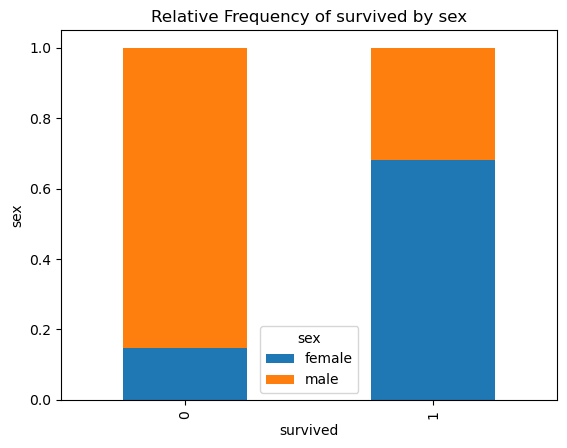

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a cross-tabulation for 'survived' and 'sex'
Gdr = pd.crosstab(df['survived'], df['sex'])

# Plot the stacked histogram for 'survived' and 'sex'
Gdr.div(Gdr.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
#show the relative frequency of 'sex' for each category of 'survived' in a stacked histogram format
#both are categorical data
plt.xlabel("survived")
plt.ylabel("sex")
plt.title("Relative Frequency of survived by sex")
plt.show()


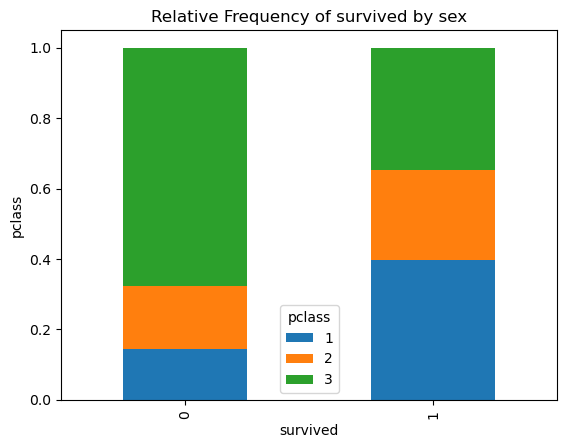

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a cross-tabulation for 'survived' and 'pclass'
Gdr = pd.crosstab(df['survived'], df['pclass'])

# Plot the stacked histogram for 'survived' and 'pclass'
Gdr.div(Gdr.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
#show the relative frequency of 'pclass' for each category of 'survived' in a stacked histogram format
#both are categorical data
plt.xlabel("survived")
plt.ylabel("pclass")
plt.title("Relative Frequency of survived by sex")
plt.show()


In [36]:
df.columns

Index(['passengerId', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [37]:
#df['sex_male'].value_counts()
df['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [38]:
# Data preprocessing
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df = df.dropna()

grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(df, row='pclass', col='sex', aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend()

In [39]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

## PREPROCESSING

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit

spl=StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train,test in spl.split(df,df[["survived","pclass","sex"]]):
    strat_train_set=df.loc[train]
    strat_test_set=df.loc[test]

In [41]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        imputer=SimpleImputer(strategy="mean")
        X["age"]=imputer.fit_transform(X[["age"]])
        return X

In [42]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder (BaseEstimator, TransformerMixin):
    def fit (self, X, y=None) :
        return self
    def transform (self, X):
        encoder=OneHotEncoder()
        matrix = encoder.fit_transform (X[['embarked']] ).toarray()
        column_names = ["C", "S", "Q", "N"]
        for i in range (len (matrix.T)):
            X [column_names[i]] = matrix.T[i]
        matrix = encoder.fit_transform (X[['sex']]).toarray()
        column_names = ["Female", "Male"]
        for i in range (len (matrix.T)):
            X[column_names[i]] = matrix.T[i]
        return X

In [43]:
class FeatureDropper(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X.drop(["embarked","name","ticket","cabin","sex","n","class","who","deck","embark_town","alive"],axis=1,errors="ignore")
    

In [44]:
from sklearn.pipeline import Pipeline

In [45]:
pipeline = Pipeline ([("ageimputer", AgeImputer ()),
                    ("featuredropper", FeatureDropper ())])

# MODEL BUILDING

In [46]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [47]:
strat_train_set

,passengerId,survived,pclass,age,sibsp,parch,fare,adult_male,alone
715,715,0,3,19.000000,0,0,7.6500,True,True
787,787,0,3,8.000000,4,1,29.1250,False,False
44,44,1,3,19.000000,0,0,7.8792,False,True
454,454,0,3,29.699118,0,0,8.0500,True,True
438,438,0,1,64.000000,1,4,263.0000,True,False
...,...,...,...,...,...,...,...,...,...
681,681,1,1,27.000000,0,0,76.7292,True,True
58,58,1,2,5.000000,1,2,27.7500,False,False
267,267,1,3,25.000000,1,0,7.7750,True,False
804,804,1,3,27.000000,0,0,6.9750,True,True


In [48]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['survived'], axis=1)
Y = strat_train_set['survived']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=3)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier ()
param_gird = [
        {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]
grid_search= GridSearchCV (clf, param_gird, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit (X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [50]:
Y_predict=grid_search.predict(X_test)

In [51]:
Y_predict

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [52]:

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy=accuracy_score(Y_predict,Y_test)
recall = recall_score(Y_test,Y_predict, average='binary')
precision=precision_score(Y_test,Y_predict, average='binary')
score = f1_score(Y_test,Y_predict, average='binary')

In [53]:
print("Accuracy : ",accuracy)
print("Precision : ",precision)
print("Recall : ",recall)
print("Score : ",score)

Accuracy :  0.7972027972027972
Precision :  0.782608695652174
Recall :  0.6545454545454545
Score :  0.7128712871287128


In [54]:
print(classification_report(Y_predict,Y_test))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        97
           1       0.65      0.78      0.71        46

    accuracy                           0.80       143
   macro avg       0.77      0.79      0.78       143
weighted avg       0.81      0.80      0.80       143



In [55]:
co_matrix=confusion_matrix(Y_predict,Y_test)
co_matrix

array([[78, 19],
       [10, 36]], dtype=int64)

In [56]:
from sklearn.linear_model import LogisticRegression
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,Y,test_size=0.2,random_state=10)
lr_clf = LogisticRegression(C=1.0,penalty='l2', solver='saga',max_iter=100,class_weight=None)
#C: The inverse of the regularization strength. Smaller values of C indicate stronger regularization.
#penalty: The type of regularization to apply ('l1' for L1 regularization, 'l2' for L2 regularization).
#solver: The optimization algorithm to use ('lbfgs' is a solver that works well for small datasets).
#max_iter: The maximum number of iterations for the optimization algorithm.
lr_clf.fit(X_train1,y_train1)
lr_clf.score(X_test1,y_test1)

0.7062937062937062

In [58]:
# importing decision tree classifier from sklearn library

from sklearn.tree import DecisionTreeClassifier

# initialising decision tree with default hyperparameters, apart from max_depth which is 7 so that we can plot and read tree
DT_default = DecisionTreeClassifier(max_depth=7)

# fitting descision tree on train & test data
model_DT = DT_default.fit(X_train,Y_train)
model_DT.score(X_test,Y_test)

0.7762237762237763

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X_train3,X_test3,y_train3,y_test3=train_test_split(X,Y,test_size=0.3,random_state=42)
clf=LDA(solver='eigen',shrinkage='auto',n_components=1 )
clf.fit(X,Y)
clf.score(X_test,Y_test)

0.7902097902097902

In [67]:
from sklearn.ensemble import ExtraTreesRegressor
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, Y, random_state=10)
reg = ExtraTreesRegressor(n_estimators=100,max_depth=10,min_samples_split=2,min_samples_leaf=1,bootstrap=True).fit(X_train4, y_train4)
reg.score(X_test4,y_test4)

0.4138763129858225

In [68]:
from sklearn.neighbors import KNeighborsClassifier 
X_train5, X_test5, y_train5, y_test5= train_test_split(X, Y, test_size=0.3, random_state=2)
knn = KNeighborsClassifier(n_neighbors=5,weights="uniform",algorithm="auto", leaf_size=30, p=2,metric="minkowski")
knn.fit(X_train5, y_train5)
knn.score(X_test4,y_test4)

0.7191011235955056

In [69]:
from sklearn.naive_bayes import GaussianNB  
X_train6,X_test6,y_train6,y_test6=train_test_split(X,Y,test_size=0.3,random_state=0)

classifier = GaussianNB(priors=None,var_smoothing=1e-09)  
classifier.fit(X_train6, y_train6) 
classifier.score(X_test6,y_test6)

0.8130841121495327

In [71]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LogisticRegression(), X, Y, cv=cv)

array([0.81118881, 0.83216783, 0.81118881, 0.83916084, 0.81818182])

In [72]:
'''from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  '''
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

# Initialize KFold with the desired number of splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

LR = LogisticRegression()

# perform k-fold cross-validation using  logistic regression
LR_metric=cross_val_score(LR,X,Y,cv=kf)
print(LR_metric)

# calculate the average performance
accuracy=LR_metric.mean()*100.0
print(accuracy.max())

[0.78321678 0.83916084 0.83802817 0.80985915 0.82394366]
81.88417216586231
